Low SHAPE/Low Shannon entropy analysis of DENV2 genome
======================================================

This is a recreation of an analysis in Figure 1 from Dethoff et al. 2018. Data files
were obtained from the authors.
- DENV2_EX_1M7_MAP.map
- DENV2_EX-Diff_BP-prob.dp
- DENV2_EX-Diff_MFE.ct

These files were produced by performing SHAPE-MaP, analyzing resulting sequencing
reads using ShapeMapper, then producing a secondary structure model and base
pairing probabilities using SuperFold.

In this example, we will analyze SHAPE-MaP data from the Dengue 2 viral genome.
Low SHAPE Low Shannon entropy (lowSS) regions in a long RNA such as this can be
used to detect regions of well-defined structure. Functional elements tend to
be over-represented in these lowSS regions. These regions are defined by low
SHAPE reactivity, indicating low local nucleotide flexibility, and by low
Shannon entropy, a measure of likelihood to form alternative structures.

In [1]:
import rnavigate as rnav

Inputs
------

- sample
  - an arbitrary string that will serve as a label on plots
- shapemap
  - ShapeMapper2 output file, either _profile.txt or .map file
- pairprob
  - Superfold output file, .dp file providing basepairing probabilities
- ct
  - Superfold output file, .ct file providing an MFE structure

Notes:
- pairprob and ct can be generated from other structure prediction algorithms
  (including Vienna RNAfold, NUPACK, RNAstructure)
- ct can also be provided in dotbracket, XRNA, VARNA, NSD, or CTE formats


In [2]:
sample = rnav.Sample(
    sample="DENV2 Genome",
    shapemap="DENV2_EX-1M7_MAP.map",
    pairprob="DENV2_EX-Diff_BP-prob.dp",
    ct="DENV2_EX-Diff_MFE.ct")

Plot the result of the low SHAPE, low Shannon entropy analysis
--------------------------------------------------------------

First, we will perform the low SHAPE, low Shannon entropy (LowSS) analysis. By
default, this will produce a full-length plot. However, DENV2 is 10732 nt,
which is a bit unweildy, so we will set `show=False` to turn off the plot for now.

In [3]:
analysis = rnav.LowSS(sample, show=False)

We will display only the first 2000 nucleotides using the region argument:
`region=[start, end]`. We will also create a scale for the pairing probability
data.

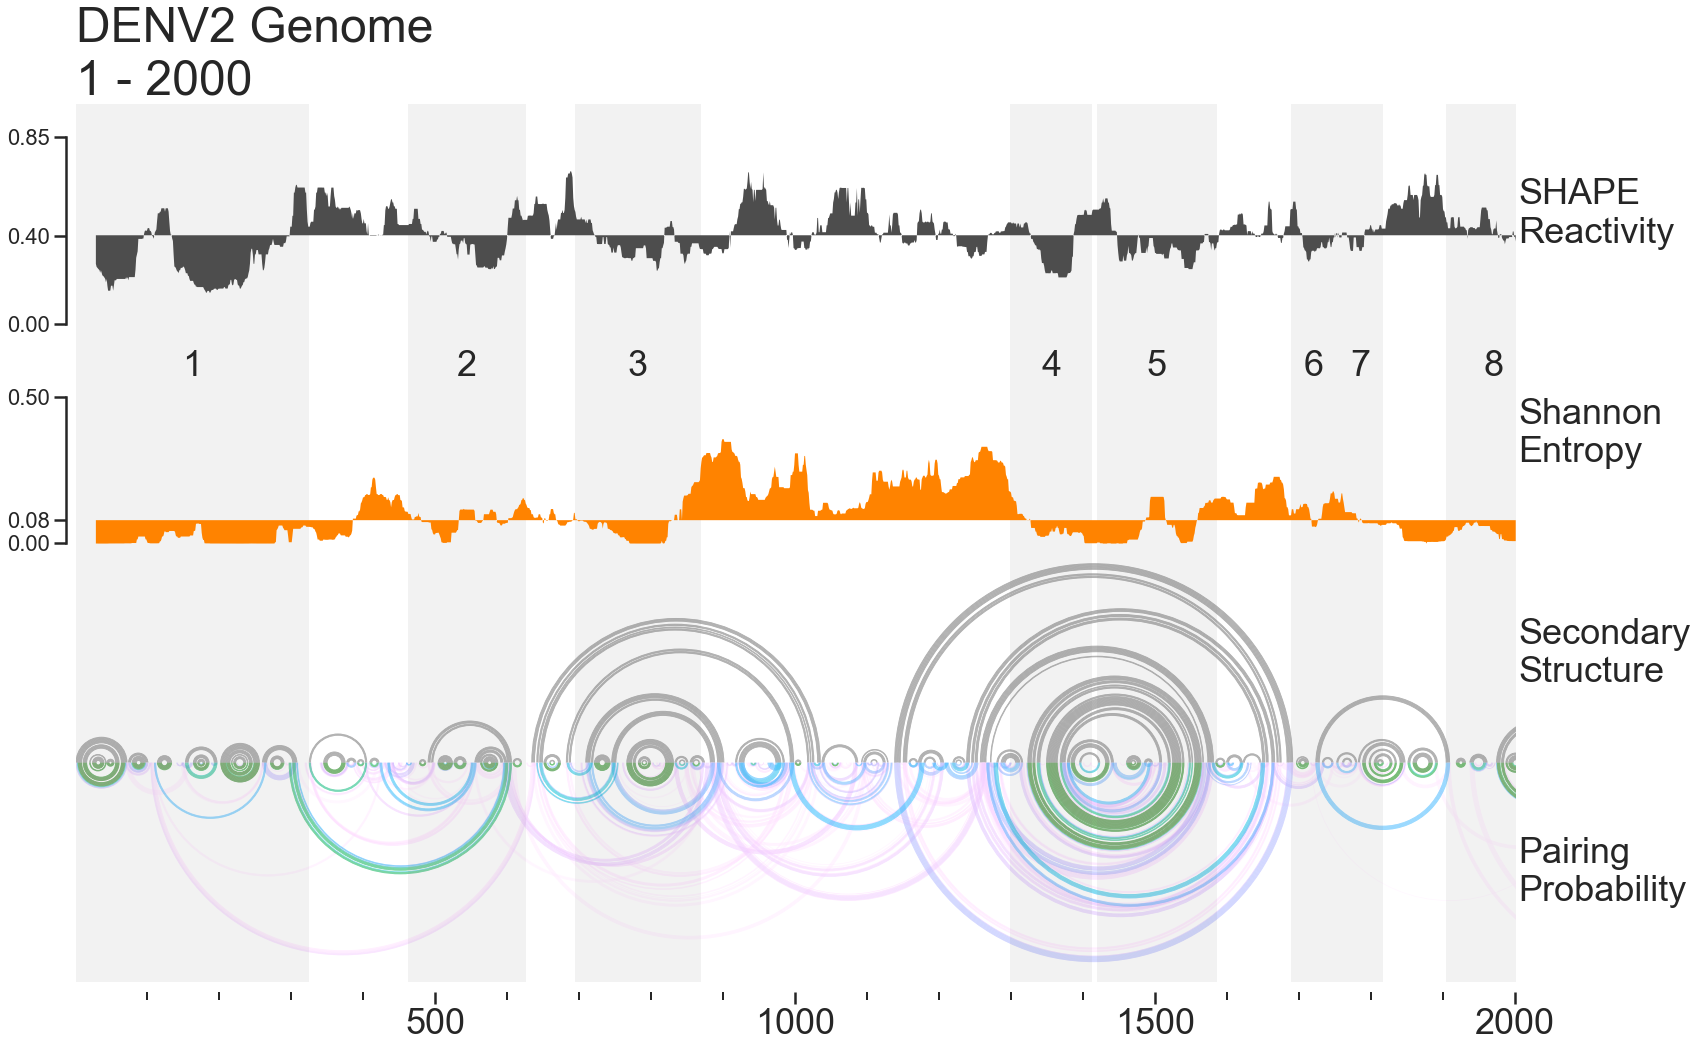

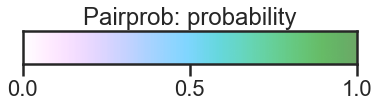

In [4]:
plot = analysis.plot_LowSS(region=[1, 2000])

rnav.plots.Plot.view_colormap(
    interactions=sample.data["pairprob"],
    ticks=[0, 5, 10],
    values=[0.0, 0.5, 1.0])